In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

In [2]:
file_path = 'UpdatedStudentSurvey.xlsx'  
df = pd.read_excel(file_path, engine='openpyxl')
df

,Gender,Age,Ethnicity,Religion,Parents Work,Siblings,Housing,Current GPA,Desired GPA,Absences,...,Future Planned,Career Option 1,Career Option 2,Career Option 3,Interested Career 1,Interested Career 2,Interested Career 3,Skill 1,Skill 2,Skill 3
0,Male,19,Chinese,Buddhist,Both Works,2,HDB,2.71,2.86,0,...,Not yet,Nan,Nan,Nan,Software Developer,Ai Analyst,Cybersecurity Expert,Code,Detailed,Adaptable
1,Male,21,Chinese,Buddhist,Both Works,2,HDB,0.98,1.50,6,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
2,Male,19,Chinese,Buddhist,Father Only,2,Condominium,2.86,3.30,0,...,Not yet,Nan,Nan,Nan,Entrepreneur,Food Reviewer,Food Vlogger,Innovative,Critical,Entertaining
3,Male,22,Chinese,Catholic,Both Works,2,Bungalow,3.10,4.00,7,...,Undecided,Nan,Nan,Nan,Nan,Nan,Nan,Detailed,Nan,Nan
4,Male,19,Chinese,Buddhist,Both Works,1,HDB,3.00,3.50,1,...,Undecided,Nan,Nan,Nan,Engineer,Nan,Nan,Nan,Nan,Nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Female,19,Indian,Islam,Both Works,2,HDB,3.45,3.60,3,...,Not yet,Nan,Nan,Nan,Teacher,Hospital Lab,Pharmacist,Precision,Laboratory Skills,Timeliness
197,Male,19,Chinese,Buddhist,Mother Only,2,HDB,2.90,3.50,0,...,Undecided,Nan,Nan,Nan,Translator,Reporter,Sports Commentator,Language,Outspoken,Confidence
198,Female,19,Chinese,Christian,Both Works,2,Condominium,2.40,3.00,1,...,Not yet,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan,Nan
199,Female,24,Chinese,Christian,Mother Only,4,HDB,1.81,2.50,0,...,Planned,Nurse,Journalist,Nan,Nan,Nan,Nan,Patience,Writing Skills,Communication Skills


C:\Users\22013343\AppData\Local\Temp\ipykernel_17692\307471486.py:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Absences'], cluster_data['Current GPA'], label=cluster_labels[cluster], cmap='viridis', marker='o')


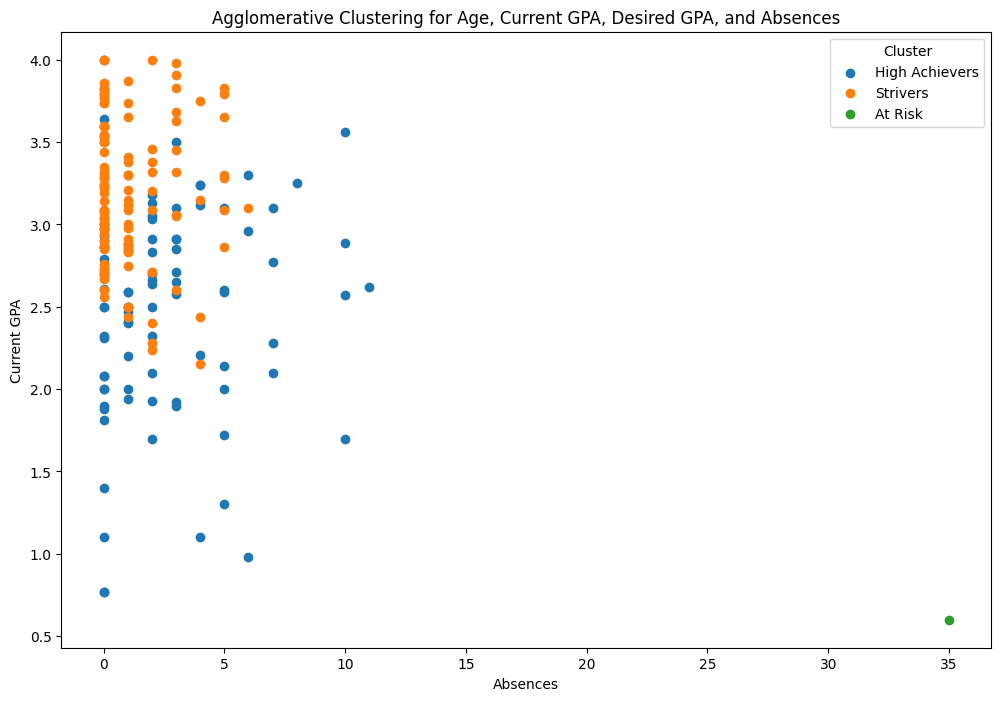

C:\Users\22013343\AppData\Local\Temp\ipykernel_17692\307471486.py:33: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(cluster_data['Absences'], cluster_data['Desired GPA'], label=cluster_labels[cluster], cmap='viridis', marker='o')


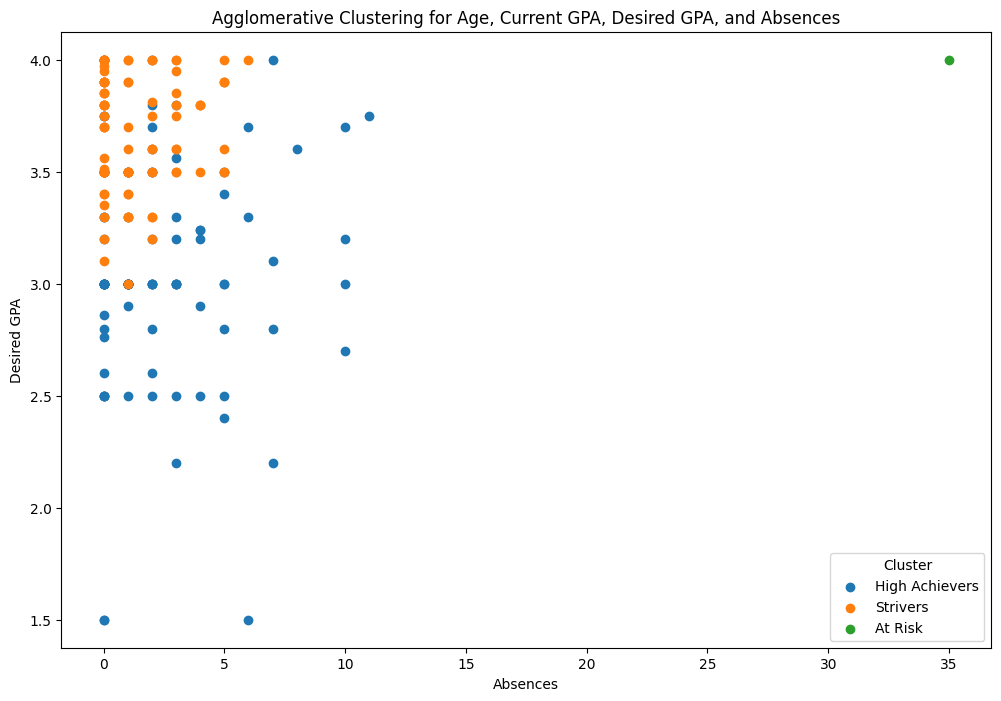

In [3]:
features = ['Age', 'Current GPA', 'Desired GPA', 'Absences']
data = df[features].dropna()

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Perform Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters = agg_clustering.fit_predict(normalized_data)

# Adding the cluster labels to the data
data['Cluster'] = clusters

# Define cluster names or any descriptive text
cluster_labels = ['High Achievers', 'Strivers', 'At Risk']

# Plotting the scatter plot for clustering with legend for Current GPA vs. Absences
plt.figure(figsize=(12, 8))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Absences'], cluster_data['Current GPA'], label=cluster_labels[cluster], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering for Age, Current GPA, Desired GPA, and Absences')
plt.xlabel('Absences')
plt.ylabel('Current GPA')
plt.legend(title='Cluster')
plt.show()

# Plotting the scatter plot for clustering with legend for Desired GPA vs. Absences
plt.figure(figsize=(12, 8))
for cluster in sorted(data['Cluster'].unique()):
    cluster_data = data[data['Cluster'] == cluster]
    plt.scatter(cluster_data['Absences'], cluster_data['Desired GPA'], label=cluster_labels[cluster], cmap='viridis', marker='o')
plt.title('Agglomerative Clustering for Age, Current GPA, Desired GPA, and Absences')
plt.xlabel('Absences')
plt.ylabel('Desired GPA')
plt.legend(title='Cluster')
plt.show()